In [95]:
!pip install pandas

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Titanic-Dataset.csv')

print(titanic_data.head())

# Установка стиля для графиков
sns.set(style="whitegrid")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 1. Текстовое описание набора данных 'Titanic-Dataset'

Это классический **Titanic Dataset**, который содержит информацию о пассажирах злополучного рейса Титаника. Этот набор данных используется для изучения задач классификации и предсказания выживаемости пассажиров.

# 2. Основные характеристики набора данных

- **Размер:** 891 записи и 12 признаков.  
- **Целевая переменная:** `Survived` — показывает, выжил пассажир (1) или нет (0).  
- **Признаки:**
  - `PassengerId`: Уникальный идентификатор пассажира.
  - `Pclass`: Класс обслуживания (1 — первый класс, 2 — второй класс, 3 — третий класс).
  - `Name`: Имя пассажира.
  - `Sex`: Пол пассажира.
  - `Age`: Возраст пассажира (присутствуют пропуски).
  - `SibSp`: Количество братьев, сестер или супругов на борту.
  - `Parch`: Количество родителей или детей на борту.
  - `Ticket`: Номер билета.
  - `Fare`: Стоимость билета.
  - `Cabin`: Номер каюты (содержит множество пропусков).
  - `Embarked`: Порт посадки (`C`, `Q`, `S`).
### Особенности:
- Данные содержат пропуски в колонках `Age`, `Cabin` и `Embarked`.
- Это хороший набор данных для изучения классификации, работы с категориальными признаками, обработки пропусков и построения моделей машинного обучения

# 3. Визуальное исследование датасета.

1. **Распределение целевой переменной (`Survived`)** — показывает соотношение выживших и погибших пассажиров. Видно, что погибших гораздо больше.  

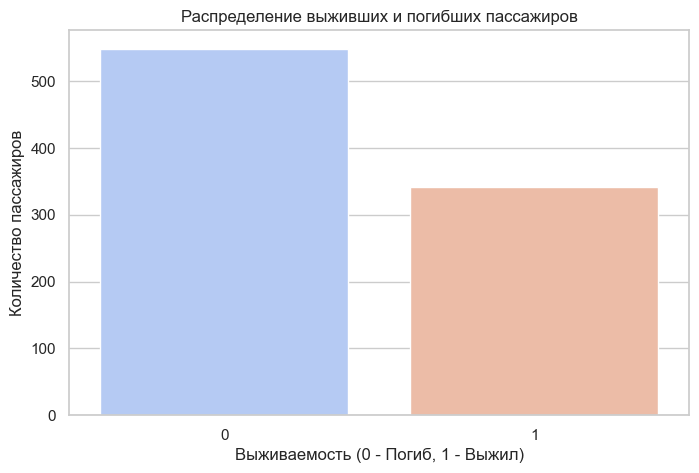

In [103]:
# 1. Распределение целевой переменной (Survived)
plt.figure(figsize=(8, 5))
sns.countplot(x="Survived", hue="Survived", data=data, palette="coolwarm", dodge=False)
plt.title("Распределение выживших и погибших пассажиров")
plt.xlabel("Выживаемость (0 - Погиб, 1 - Выжил)")
plt.ylabel("Количество пассажиров")
plt.legend([], [], frameon=False)  # Убираем легенду, так как она избыточна
plt.show()

2. **Распределение возраста** — демонстрирует, что большинство пассажиров были в возрасте от 20 до 40 лет.  

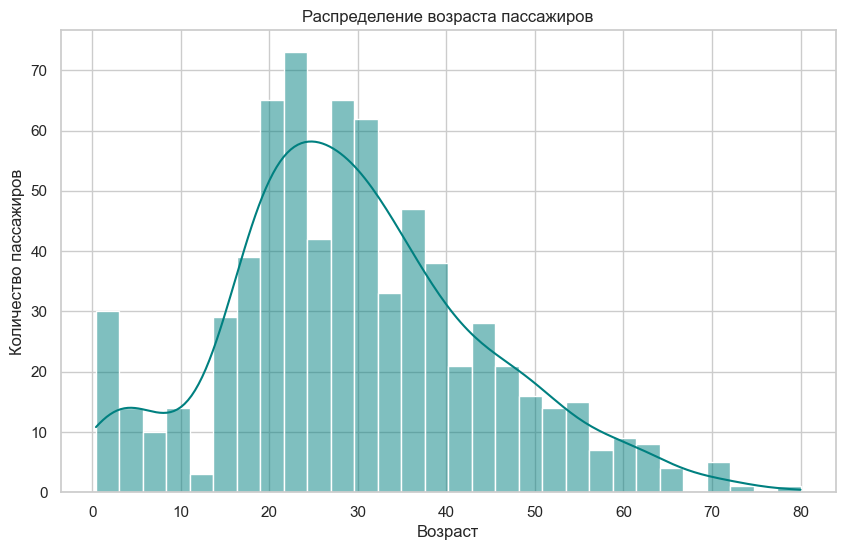

In [105]:
# 2. Распределение возраста пассажиров
plt.figure(figsize=(10, 6))
sns.histplot(data["Age"].dropna(), bins=30, kde=True, color="teal")
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.show()

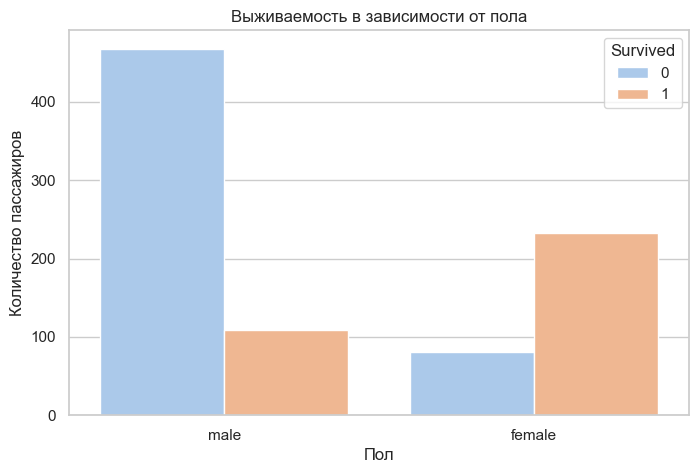

In [106]:
# 3. Выживаемость в зависимости от пола
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", hue="Survived", data=data, palette="pastel")
plt.title("Выживаемость в зависимости от пола")
plt.xlabel("Пол")
plt.ylabel("Количество пассажиров")
plt.show()

3. **Выживаемость в зависимости от пола** — ясно показывает, что женщины выживали значительно чаще, чем мужчины.  

4. **Выживаемость в зависимости от класса (`Pclass`)** — пассажиры первого класса имели наибольший шанс на выживание, а пассажиры третьего класса пострадали больше всего.  

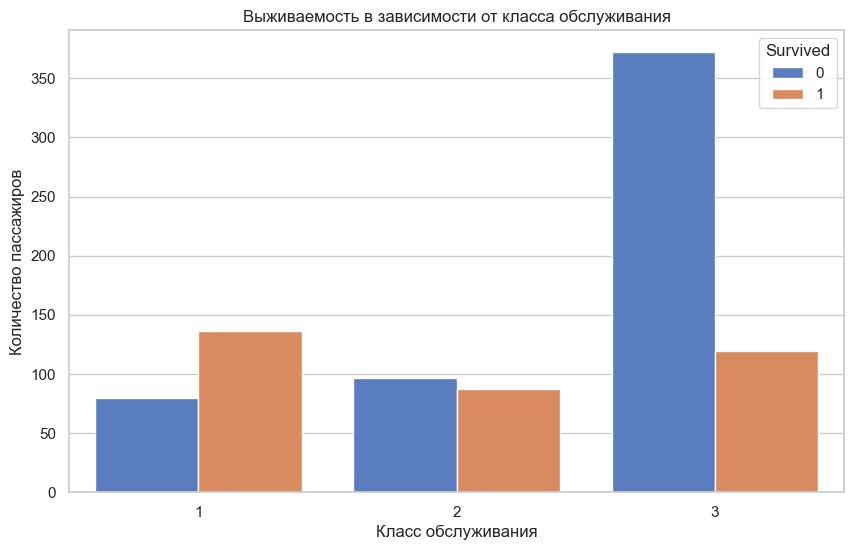

In [109]:
# 4. Выживаемость в зависимости от класса (Pclass)
plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", hue="Survived", data=data, palette="muted")
plt.title("Выживаемость в зависимости от класса обслуживания")
plt.xlabel("Класс обслуживания")
plt.ylabel("Количество пассажиров")
plt.show()

# 4. Информация о корреляции признаков.

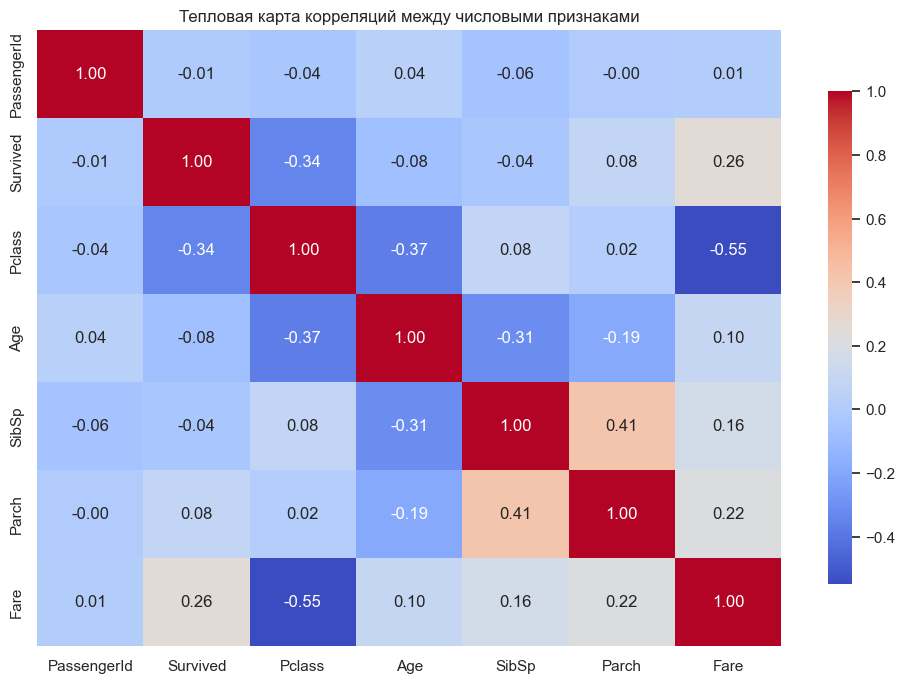

In [111]:
# 5. Корреляция признаков
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['number'])  # Выбираем только числовые столбцы
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Тепловая карта корреляций между числовыми признаками")
plt.show()


- Корреляционная матрица показывает взаимосвязи между числовыми признаками.
- Мы используем только числовые данные (Survived, Pclass, Age, SibSp, Parch, Fare), чтобы избежать ошибок при построении тепловой карты.
## Основные наблюдения:
- Сильная корреляция между Pclass и Fare: чем выше класс, тем дороже билет.
- Слабая положительная корреляция между Survived и Fare, что указывает на больший шанс выживания у пассажиров с дорогими билетами.